In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [39]:
cab_data=pd.read_csv('C:/Users/mizoh/Desktop/Datasets/Cab_data.csv')
trans_data=pd.read_csv('C:/Users/mizoh/Desktop/Datasets/Transaction_ID.csv')
city_data=pd.read_csv('C:/Users/mizoh/Desktop/Datasets/City.csv')
cust_data=pd.read_csv('C:/Users/mizoh/Desktop/Datasets/Customer_ID.csv')

In [40]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08-01-16,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06-01-16,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02-01-16,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07-01-16,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03-01-16,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [41]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [42]:
cab_data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [43]:
trans_data.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [44]:
city_data.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [45]:
cust_data.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [46]:
for col in cab_data.columns:
    if ' ' in col:
        cab_data = cab_data.rename(columns={col:col.replace(' ','_')})

In [48]:
for col in trans_data.columns:
    if ' ' in col:
        trans_data=trans_data.rename(columns={col:col.replace(' ','_')})

In [50]:
for col in cust_data.columns:
    if ' ' in col:
        cust_data = cust_data.rename(columns={col:col.replace(' ','_')})

In [51]:
for col in city_data.columns:
    if ' ' in col:
        city_data = city_data.rename(columns={col:col.replace(' ','_')})

In [52]:
cab_data['Date_of_Travel'] = pd.to_datetime(cab_data['Date_of_Travel'])

In [53]:
cab_data.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-07-01,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-03-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [56]:
months=[]
years=[]
for i in range(len(cab_data.Date_of_Travel)):
    months.append(cab_data.Date_of_Travel[i].month)
    years.append(cab_data.Date_of_Travel[i].year)
cab_data['Month']=months
cab_data['Year']=years

In [57]:
cab_data.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,8,2016
1,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,6,2016
2,10000013,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2,2016
3,10000014,2016-07-01,Pink Cab,ATLANTA GA,33.17,377.40,351.602,7,2016
4,10000015,2016-03-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,3,2016


In [66]:
cab_data.drop("Date_of_Travel",axis=1,inplace=True)

In [67]:
PinkCab=cab_data[cab_data.Company=='Pink Cab']
YellowCab=cab_data[cab_data.Company=='Yellow Cab']

In [73]:
#Creating Master data:
left=cab_data.set_index(['Transaction_ID'])
right=trans_data.set_index(['Transaction_ID'])
data=left.join(right)
data

,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Customer_ID,Payment_Mode
Transaction_ID,,,,,,,,,
10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,8,2016,29290,Card
10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,6,2016,27703,Card
10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,2,2016,28712,Cash
10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,7,2016,28020,Cash
10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,3,2016,27182,Card
...,...,...,...,...,...,...,...,...,...
10440101,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,8,2018,52392,Cash
10440104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,4,2018,53286,Cash
10440105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,5,2018,52265,Cash


In [74]:
left=data.set_index([data.index,'Customer_ID'])
right=cust_data.set_index(['Customer_ID'])
data=left.join(right)
data

,,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income_(USD/Month)
Transaction_ID,Customer_ID,,,,,,,,,,,
10000011,29290,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,8,2016,Card,Male,28,10813
10000012,27703,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,6,2016,Card,Male,27,9237
10000013,28712,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,2,2016,Cash,Male,53,11242
10000014,28020,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,7,2016,Cash,Male,23,23327
10000015,27182,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,3,2016,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...
10440101,52392,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,8,2018,Cash,Male,24,15651
10440104,53286,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,4,2018,Cash,Male,32,6528
10440105,52265,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,5,2018,Cash,Male,56,7966


In [76]:
left=data.set_index([data.index,'City'])
right=city_data.set_index(['City'])
data=left.join(right)
data

,,,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
Transaction_ID,Customer_ID,City,,,,,,,,,,,,
10000011,29290,ATLANTA GA,Pink Cab,30.45,370.95,313.6350,8,2016,Card,Male,28,10813,"814,885","24,701"
10000012,27703,ATLANTA GA,Pink Cab,28.62,358.52,334.8540,6,2016,Card,Male,27,9237,"814,885","24,701"
10000013,28712,ATLANTA GA,Pink Cab,9.04,125.20,97.6320,2,2016,Cash,Male,53,11242,"814,885","24,701"
10000014,28020,ATLANTA GA,Pink Cab,33.17,377.40,351.6020,7,2016,Cash,Male,23,23327,"814,885","24,701"
10000015,27182,ATLANTA GA,Pink Cab,8.73,114.62,97.7760,3,2016,Card,Male,33,8536,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10440101,52392,WASHINGTON DC,Yellow Cab,4.80,69.24,63.3600,8,2018,Cash,Male,24,15651,"418,859","127,001"
10440104,53286,WASHINGTON DC,Yellow Cab,8.40,113.75,106.8480,4,2018,Cash,Male,32,6528,"418,859","127,001"
10440105,52265,WASHINGTON DC,Yellow Cab,27.75,437.07,349.6500,5,2018,Cash,Male,56,7966,"418,859","127,001"


In [77]:
data.reset_index()

,Transaction_ID,Customer_ID,City,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
0,10000011,29290,ATLANTA GA,Pink Cab,30.45,370.95,313.6350,8,2016,Card,Male,28,10813,"814,885","24,701"
1,10000012,27703,ATLANTA GA,Pink Cab,28.62,358.52,334.8540,6,2016,Card,Male,27,9237,"814,885","24,701"
2,10000013,28712,ATLANTA GA,Pink Cab,9.04,125.20,97.6320,2,2016,Cash,Male,53,11242,"814,885","24,701"
3,10000014,28020,ATLANTA GA,Pink Cab,33.17,377.40,351.6020,7,2016,Cash,Male,23,23327,"814,885","24,701"
4,10000015,27182,ATLANTA GA,Pink Cab,8.73,114.62,97.7760,3,2016,Card,Male,33,8536,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,52392,WASHINGTON DC,Yellow Cab,4.80,69.24,63.3600,8,2018,Cash,Male,24,15651,"418,859","127,001"
359388,10440104,53286,WASHINGTON DC,Yellow Cab,8.40,113.75,106.8480,4,2018,Cash,Male,32,6528,"418,859","127,001"
359389,10440105,52265,WASHINGTON DC,Yellow Cab,27.75,437.07,349.6500,5,2018,Cash,Male,56,7966,"418,859","127,001"
359390,10440106,52175,WASHINGTON DC,Yellow Cab,8.80,146.19,114.0480,5,2018,Card,Male,32,6423,"418,859","127,001"


In [121]:
YellowCab = data[data['Company']=='Yellow Cab'].reset_index()
PinkCab = data[data['Company']=='Pink Cab'].reset_index()

In [122]:
YellowCab.head()

,Transaction_ID,Customer_ID,City,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
0,10000384,27602,ATLANTA GA,Yellow Cab,33.93,1341.17,464.1624,2,2016,Card,Male,23,8542,"814,885","24,701"
1,10000385,27594,ATLANTA GA,Yellow Cab,42.18,1412.06,516.2832,9,2016,Cash,Male,28,3901,"814,885","24,701"
2,10000386,27884,ATLANTA GA,Yellow Cab,10.60,364.62,132.2880,3,2016,Cash,Male,32,13505,"814,885","24,701"
3,10000387,28533,ATLANTA GA,Yellow Cab,26.75,838.00,333.8400,6,2016,Cash,Male,39,28386,"814,885","24,701"
4,10000388,29039,ATLANTA GA,Yellow Cab,46.02,1540.61,596.4192,7,2016,Card,Male,35,17761,"814,885","24,701"


In [123]:
YellowCab.drop(['Company','Payment_Mode','Gender','Population','Users','City'],axis=1,inplace=True)

In [124]:
PinkCab.drop(['Company', 'Payment_Mode', 'Gender','Population','Users','City'], axis=1, inplace=True)

In [125]:
YellowCab_X = YellowCab.drop(['Price_Charged'], axis=1)
YellowCab_y = YellowCab['Price_Charged'].copy()

In [126]:
PinkCab_X = PinkCab.drop(['Price_Charged'], axis=1)
PinkCab_y = PinkCab['Price_Charged'].copy()

In [127]:
#Yellow Cab model:

In [128]:
import statsmodels.api as sm

In [129]:
x_constant = sm.add_constant(YellowCab_X)
YellowCab_model = sm.OLS(YellowCab_y, x_constant).fit()
YellowCab_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Price_Charged   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                 1.292e+05
Date:                Tue, 27 Jul 2021   Prob (F-statistic):               0.00
Time:                        17:08:21   Log-Likelihood:            -1.7313e+06
No. Observations:              274681   AIC:                         3.463e+06
Df Residuals:                  274672   BIC:                         3.463e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.124e+05   2225.404    -50.505      0.000   -1.17e+05   -1.08e+05
Transaction_ID        -0.0005   7.32e-06    -65.392      0.000      -0.000      -0.000
Customer_ID           -0.0028   1.16e-05   -243.210      0.000      -0.003      -0.003
KM_Travelled          20.3487      0.180    113.328      0.000      19.997      20.701
Cost_of_Trip          -0.0063      0.014     -0.469      0.639      -0.033       0.020
Month                 -0.4757      0.092     -5.170      0.000      -0.656      -0.295
Year                  58.1797      1.139     51.092      0.000      55.948      60.412
Age                   -0.1082      0.020     -5.399      0.000      -0.148      -0.069
Income_(USD/Month)  4.485e-05   3.17e-05      1.416      0.157   -1.72e-05       0.000
==============================================================================
Omnibus:                    39759.948   Durbin-Watson:                   0.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           111855.255
Skew:                           0.786   Prob(JB):                         0.00
Kurtosis:                       5.702   Cond. No.                     9.02e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.02e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [130]:
# Cost of Trip,Month, Year, Age, Income are significant variable for Yellow Cab.

In [131]:
#Pink Cab Base Model

In [133]:
x_constant = sm.add_constant(PinkCab_X)
PinkCab_model = sm.OLS(PinkCab_y, x_constant).fit()
PinkCab_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Price_Charged   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                 6.876e+04
Date:                Tue, 27 Jul 2021   Prob (F-statistic):               0.00
Time:                        17:09:05   Log-Likelihood:            -4.7573e+05
No. Observations:               84711   AIC:                         9.515e+05
Df Residuals:                   84702   BIC:                         9.516e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               6.829e+04   2060.616     33.142      0.000    6.43e+04    7.23e+04
Transaction_ID         0.0002   6.79e-06     26.647      0.000       0.000       0.000
Customer_ID           -0.0005   1.26e-05    -43.017      0.000      -0.001      -0.001
KM_Travelled          13.4853      0.162     83.021      0.000      13.167      13.804
Cost_of_Trip           0.0292      0.015      1.993      0.046       0.000       0.058
Month                 -0.1904      0.084     -2.279      0.023      -0.354      -0.027
Year                 -34.7698      1.055    -32.972      0.000     -36.837     -32.703
Age                   -0.0421      0.018     -2.328      0.020      -0.077      -0.007
Income_(USD/Month)  2.916e-05   2.86e-05      1.020      0.308   -2.69e-05    8.52e-05
==============================================================================
Omnibus:                    28702.078   Durbin-Watson:                   0.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           278415.767
Skew:                           1.352   Prob(JB):                         0.00
Kurtosis:                      11.460   Cond. No.                     9.22e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.22e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [134]:
# Cost_of_Trip,Year, Age, Income are significant variable for Pink Cab.

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

In [143]:
X_train, X_test, y_train, y_test = train_test_split(YellowCab_X, YellowCab_y, test_size=0.3, random_state=42)

In [144]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [146]:
train_pred = lin_reg.predict(X_train)
print(f'Train score {np.sqrt(mean_squared_error(y_train, train_pred))}')
predicted = lin_reg.predict(X_test)
print(f'Test score {np.sqrt(mean_squared_error(y_test, predicted))}')

Train score 131.88042407865402
Test score 132.79571894367743


In [147]:
X_train, X_test, y_train, y_test = train_test_split(PinkCab_X, PinkCab_y, test_size=0.3, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [148]:
train_pred = lin_reg.predict(X_train)
print(f'Train score {np.sqrt(mean_squared_error(y_train, train_pred))}')

predicted = lin_reg.predict(X_test)
print(f'Test score {np.sqrt(mean_squared_error(y_test, predicted))}')

Train score 66.23987279800663
Test score 67.05422015196703


In [150]:
#Correlation
YellowCab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274681 entries, 0 to 274680
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction_ID      274681 non-null  int64  
 1   Customer_ID         274681 non-null  int64  
 2   KM_Travelled        274681 non-null  float64
 3   Price_Charged       274681 non-null  float64
 4   Cost_of_Trip        274681 non-null  float64
 5   Month               274681 non-null  int64  
 6   Year                274681 non-null  int64  
 7   Age                 274681 non-null  int64  
 8   Income_(USD/Month)  274681 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 18.9 MB


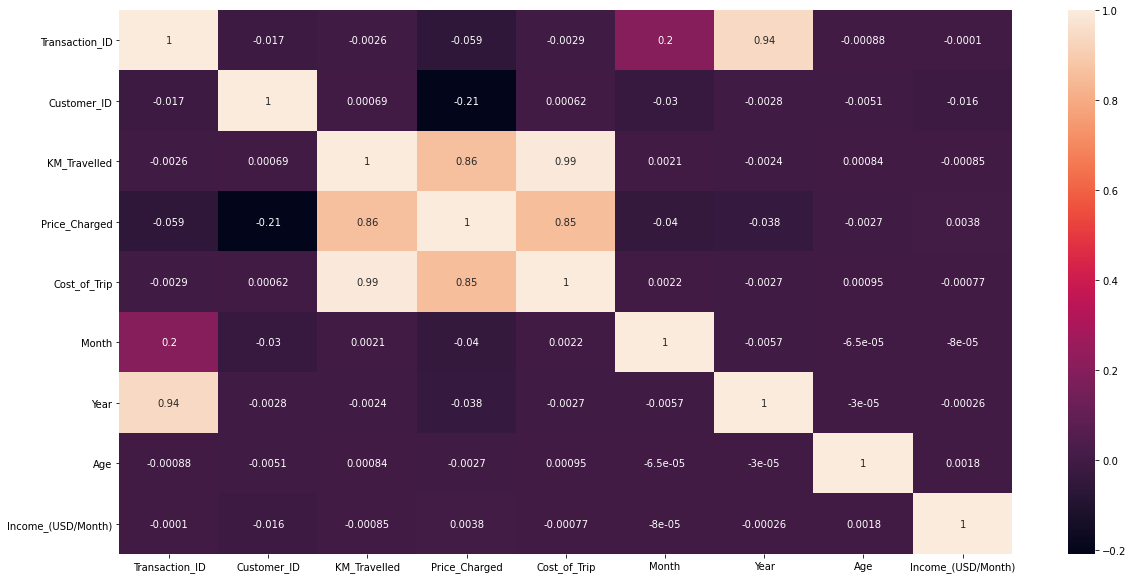

In [154]:
plt.figure(figsize=(20,10))
corr_m=YellowCab.corr()
sns.heatmap(corr_m, annot=True)
plt.show()

In [160]:
corr_m['Price_Charged'].abs().sort_values(ascending=False)[1:]

KM_Travelled          0.859709
Cost_of_Trip          0.853996
Customer_ID           0.208935
Transaction_ID        0.058665
Month                 0.040073
Year                  0.038357
Income_(USD/Month)    0.003818
Age                   0.002721
Name: Price_Charged, dtype: float64

In [161]:
#From the correlation, we can see KM travelled is correlated with Price Charged,
#followed by Cost of trip.
#Year,Month,Age,Income are not correlated.

In [162]:
#Model Building

In [163]:
#Linear Regression

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [165]:
X_trainu, X_testu, y_trainu, y_testu = train_test_split(YellowCab_X, YellowCab_y, test_size=0.3, random_state=42)

In [166]:
lin_reg_YellowCab = LinearRegression()
lin_reg_YellowCab.fit(X_trainu, y_trainu)

LinearRegression()

In [175]:
print(f'Train score {np.sqrt(mean_squared_error(y_trainu,lin_reg_YellowCab.predict(X_trainu)))}')
predicted=lin_reg_YellowCab.predict(X_testu)
print(f'Test score {np.sqrt(mean_squared_error(y_testu,predicted))}')

Train score 131.88042407865402
Test score 132.79571894367743


In [176]:
model = LinearRegression()
model.fit(X_trainu, y_trainu)

LinearRegression()

In [183]:
accuracy_YellowCab=model.score(X_testu,y_testu)
print('The accuracy is '+str(accuracy_YellowCab*100)+' %')

The accuracy is 78.91285734802449 %


In [184]:
X_trainl, X_testl, y_trainl, y_testl = train_test_split(PinkCab_X, PinkCab_y, test_size=0.3, random_state=42)
lin_reg_PinkCab=LinearRegression()
lin_reg_PinkCab.fit(X_trainl,y_trainl)

LinearRegression()

In [190]:
print(f'Train score {np.sqrt(mean_squared_error(y_trainl,lin_reg_PinkCab.predict(X_trainl)))}')
predicted=lin_reg_PinkCab.predict(X_testl)
print(f'Test score {np.sqrt(mean_squared_error(y_testl,predicted))}')

Train score 66.23987279800663
Test score 67.05422015196703


In [191]:
accuracy_PinkCab=lin_reg_PinkCab.score(X_testl,y_testl)
print('The accuracy is '+str(accuracy_PinkCab*100)+' %')

The accuracy is 86.41599088551402 %
